In [2]:
import pandas as pd

wine = pd.read_csv("/home/yjh/kubig2025/ml_dl_python/data/wine_csv_data.csv")

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
data = wine[["alcohol", "sugar", "pH"]].to_numpy()
target = wine[["class"]].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.predict(test_scaled[:5]))
print(test_target[:5].flatten())

0.7808350971714451
0.7776923076923077
[1. 1. 1. 1. 1.]
[1. 0. 1. 1. 1.]


/home/yjh/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [10]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
print(dt.predict(test_scaled[:5]))
print(test_target[:5].flatten())

0.996921300750433
0.8592307692307692
[1. 0. 1. 1. 1.]
[1. 0. 1. 1. 1.]


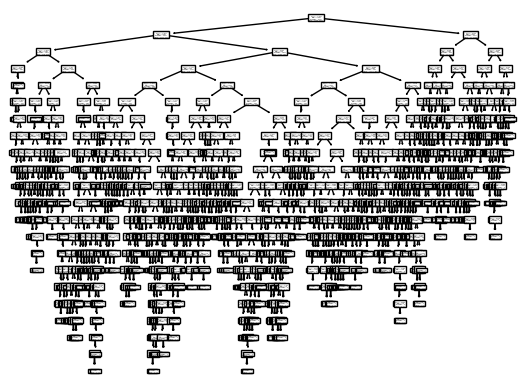

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(dt)
plt.show()

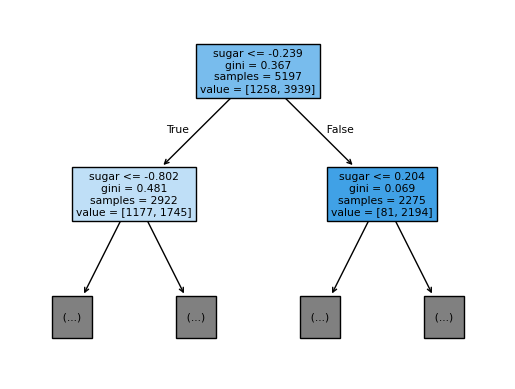

In [12]:
plot_tree(dt, max_depth=1, filled=True, feature_names=["alcohol", "sugar", "pH"])
plt.show()

In [13]:
# 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
print(dt.predict(test_scaled[:5]))
print(test_target[:5].flatten())

0.8454877814123533
0.8415384615384616
[1. 0. 1. 1. 1.]
[1. 0. 1. 1. 1.]


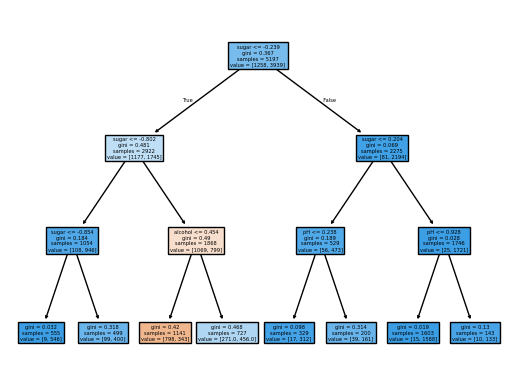

In [14]:
plot_tree(dt, filled=True, feature_names=["alcohol", "sugar", "pH"])
plt.show()